## Network Visualization in Python

- Helper notebook for article of same name published on Medium.

### Import

In [1]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
%matplotlib inline

### Load and process data

In [6]:
# load data
df = pd.read_csv("data/book1.csv")
# pick only important weights (hard threshold)
df = df.loc[df['weight']>10, :]
df

,Source,Target,Type,weight,book
8,Aemon-Targaryen-(Maester-Aemon),Jeor-Mormont,Undirected,13,1
9,Aemon-Targaryen-(Maester-Aemon),Jon-Snow,Undirected,34,1
16,Aerys-II-Targaryen,Robert-Baratheon,Undirected,12,1
17,Aggo,Daenerys-Targaryen,Undirected,11,1
30,Alliser-Thorne,Jon-Snow,Undirected,32,1
...,...,...,...,...,...
658,Sandor-Clegane,Sansa-Stark,Undirected,23,1
664,Shae,Tyrion-Lannister,Undirected,12,1
666,Shagga,Tyrion-Lannister,Undirected,17,1
676,Tyrion-Lannister,Tywin-Lannister,Undirected,40,1


In [7]:
# import
import networkx as nx
# load pandas df as networkx graph
G = nx.from_pandas_edgelist(df, 
                            source='Source', 
                            target='Target', 
                            edge_attr='weight')
print("No of unique characters:", len(G.nodes))
print("No of connections:", len(G.edges))


No of unique characters: 80
No of connections: 175


## Option 1: NetworkX

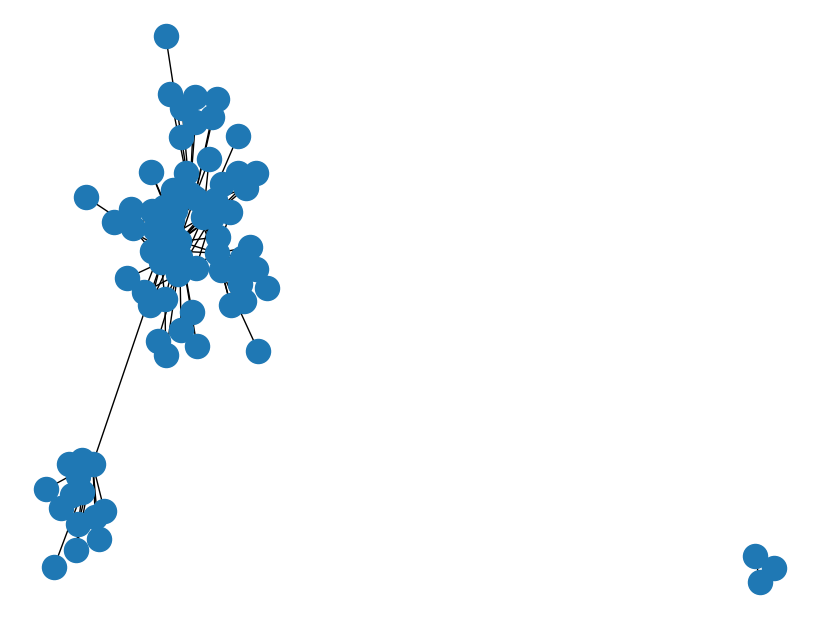

In [8]:
# all graph options
graphs_viz_options = [nx.draw, nx.draw_networkx, nx.draw_circular, nx.draw_kamada_kawai, nx.draw_random, nx.draw_shell, nx.draw_spring]

# plot graph option
selected_graph_option = 0

# plot
plt.figure(figsize=(8,6), dpi=100) 
graphs_viz_options[selected_graph_option](G)

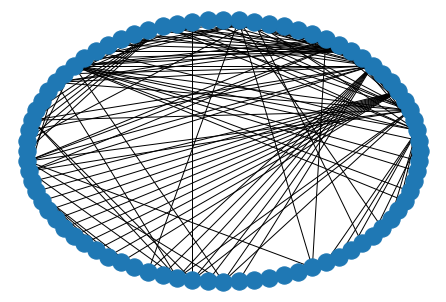

In [16]:
graphs_viz_options[2](G)

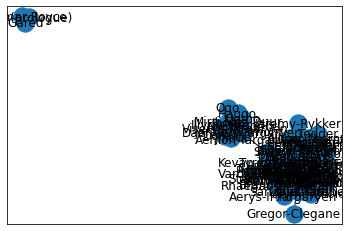

In [17]:
graphs_viz_options[1](G)

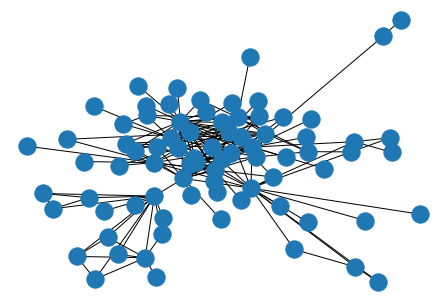

In [18]:
graphs_viz_options[3](G)

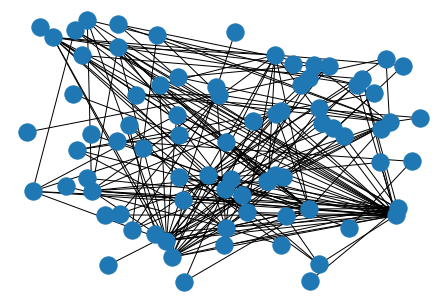

In [19]:
graphs_viz_options[4](G)

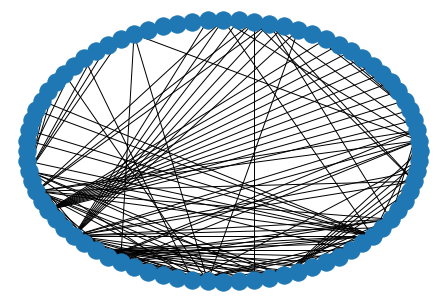

In [20]:
graphs_viz_options[5](G)

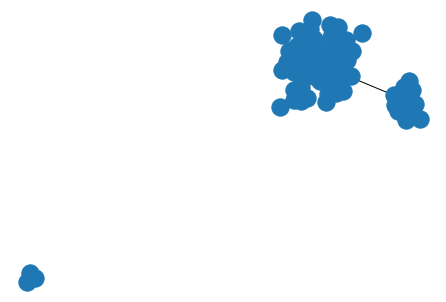

In [21]:
graphs_viz_options[6](G)

## Option 2: PyVis

In [11]:
!pip install pyvis

In [13]:
import pyvis
from pyvis.network import Network
# create vis network
net = Network(notebook=True, width=1000, height=600)
# load the networkx graph
net.from_nx(G)
# show
net.show("example.html")

## Option 3: Visdcc in Dash

- See `dash_app.py` file for the demo.

### Extra - get all draw functions in NetworkX

In [14]:
from inspect import getmembers
for x in getmembers(nx):
    if 'draw' in x[0]:
        print(x)

('draw', <function draw at 0x7ff50ba90048>)
('draw_circular', <function draw_circular at 0x7ff50ba90378>)
('draw_kamada_kawai', <function draw_kamada_kawai at 0x7ff50ba90400>)
('draw_networkx', <function draw_networkx at 0x7ff50ba900d0>)
('draw_networkx_edge_labels', <function draw_networkx_edge_labels at 0x7ff50ba902f0>)
('draw_networkx_edges', <function draw_networkx_edges at 0x7ff50ba901e0>)
('draw_networkx_labels', <function draw_networkx_labels at 0x7ff50ba90268>)
('draw_networkx_nodes', <function draw_networkx_nodes at 0x7ff50ba90158>)
('draw_planar', <function draw_planar at 0x7ff50ba906a8>)
('draw_random', <function draw_random at 0x7ff50ba90488>)
('draw_shell', <function draw_shell at 0x7ff50ba90620>)
('draw_spectral', <function draw_spectral at 0x7ff50ba90510>)
('draw_spring', <function draw_spring at 0x7ff50ba90598>)
('drawing', <module 'networkx.drawing' from '/usr/local/lib/python3.6/dist-packages/networkx/drawing/__init__.py'>)
('planar_drawing', <module 'networkx.algorit